In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [ ]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:75: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [ ]:
X = mnist.data
y = mnist.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

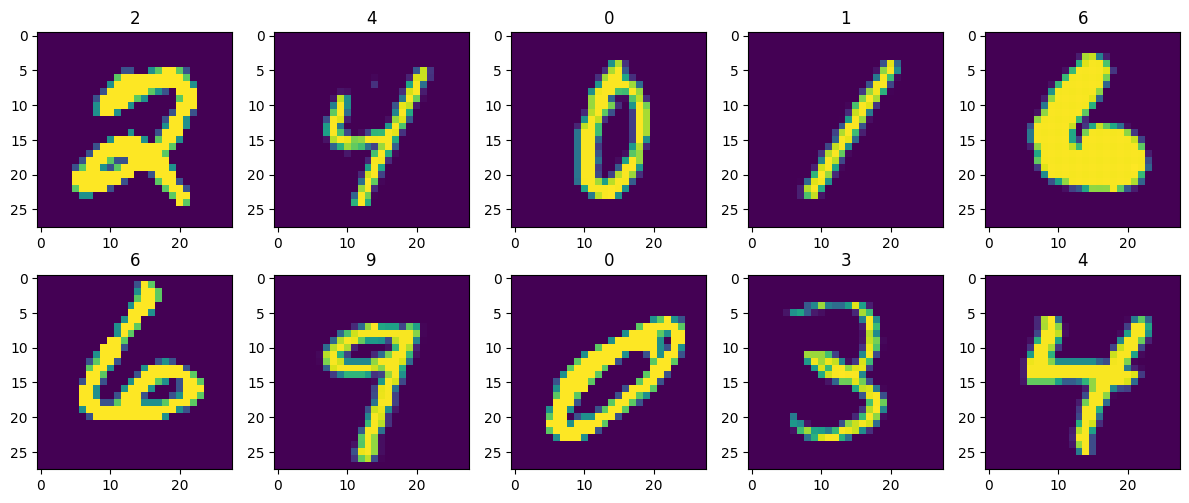

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28))
    plt.title(y_train.iloc[i])

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import F1Score, Accuracy

## Sequential

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

scce = SparseCategoricalCrossentropy()

model.compile(optimizer='adam', loss=scce, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6771 - loss: 3.5039 - val_accuracy: 0.8924 - val_loss: 0.3937
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9038 - loss: 0.3588 - val_accuracy: 0.9161 - val_loss: 0.3304
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9232 - loss: 0.2824 - val_accuracy: 0.9260 - val_loss: 0.2863
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9341 - loss: 0.2379 - val_accuracy: 0.9386 - val_loss: 0.2371
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9422 - loss: 0.2042 - val_accuracy: 0.9353 - val_loss: 0.2479
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9491 - loss: 0.1799 - val_accuracy: 0.9356 - val_loss: 0.2261
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9508 - loss: 0.1710 - val_accuracy: 0.9423 - val_loss: 0.2110
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9548 - loss: 0.1599 - 

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (32, 32)                    │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (32, 64)                    │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (32, 32)                    │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (32, 10)                    │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,928 (347.38 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59,286 (231.59 KB)

In [ ]:
import numpy as np

prediction_probabilities = model.predict(X_test.iloc[[0]].values.reshape(1, -1))
predicted_label = np.argmax(prediction_probabilities)
actual_value = y_test.iloc[0]

print(f"Predicted Label: {predicted_label}, Actual Value: {actual_value}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Predicted Label: 8, Actual Value: 8


## Functional

### default

In [ ]:
input_layer = Input(shape=(784, ), name='input_layer')

layer_1 = Dense(32, activation='relu', name='layer_1')(input_layer)
layer_2 = Dense(64, activation='relu', name='layer_2')(layer_1)
layer_3 = Dense(32, activation='relu', name='layer_3')(layer_2)

output_layer = Dense(10, activation='softmax', name='output_layer')(layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_1 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,642 (115.79 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam()
scce = SparseCategoricalCrossentropy()
acc, f1_score = Accuracy(), F1Score

model.compile(optimizer=adam, loss=scce, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6430 - loss: 3.3241 - val_accuracy: 0.8865 - val_loss: 0.4264
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8964 - loss: 0.3870 - val_accuracy: 0.9066 - val_loss: 0.3369
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9191 - loss: 0.2955 - val_accuracy: 0.9211 - val_loss: 0.2885
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9286 - loss: 0.2572 - val_accuracy: 0.9306 - val_loss: 0.2442
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9388 - loss: 0.2203 - val_accuracy: 0.9317 - val_loss: 0.2514
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9409 - loss: 0.2070 - val_accuracy: 0.9303 - val_loss: 0.2446
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9486 - loss: 0.1847 - val_accuracy: 0.9389 - val_loss: 0.2201
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9509 - loss: 0.1702 - 

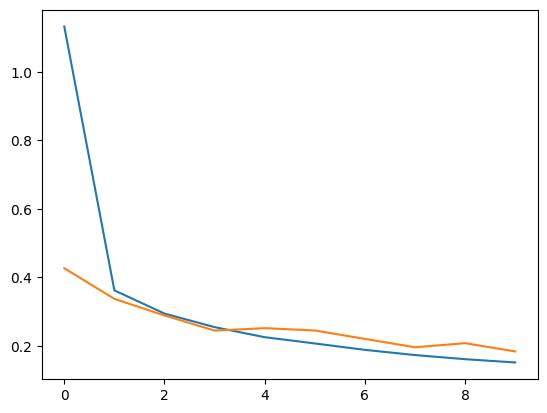

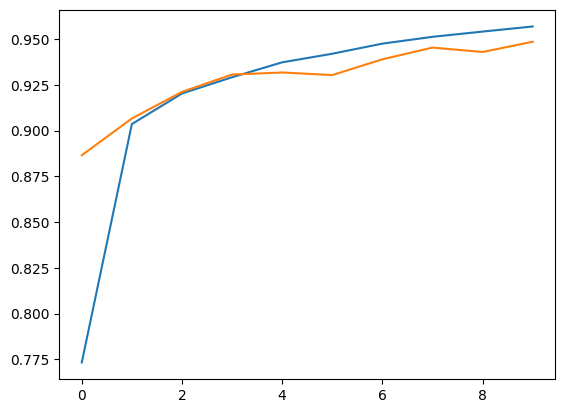

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

### change in optimizer and batch size

In [ ]:
input_layer = Input(shape=(784, ), name='input_layer')

layer_1 = Dense(32, activation='relu', name='layer_1')(input_layer)
layer_2 = Dense(64, activation='relu', name='layer_2')(layer_1)
layer_3 = Dense(32, activation='relu', name='layer_3')(layer_2)

output_layer = Dense(10, activation='softmax', name='output_layer')(layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
adam = Adam(learning_rate=0.01, beta_1=0.91, beta_2=0.988)
scce = SparseCategoricalCrossentropy()
acc, f1_score = Accuracy(), F1Score

model.compile(optimizer=adam, loss=scce, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4714 - loss: 5.3070 - val_accuracy: 0.7782 - val_loss: 0.7010
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7929 - loss: 0.6459 - val_accuracy: 0.8729 - val_loss: 0.4507
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8607 - loss: 0.4776 - val_accuracy: 0.8871 - val_loss: 0.4132
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8868 - loss: 0.4074 - val_accuracy: 0.8941 - val_loss: 0.3950
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9023 - loss: 0.3768 - val_accuracy: 0.9014 - val_loss: 0.3737
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9082 - loss: 0.3596 - val_accuracy: 0.9009 - val_loss: 0.3881
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9077 - loss: 0.3648 - val_accuracy: 0.9067 - val_loss: 0.3714
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9113 - loss: 0.3526 - val_accuracy: 0.

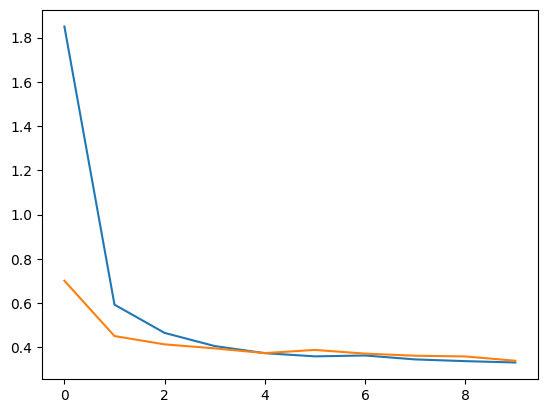

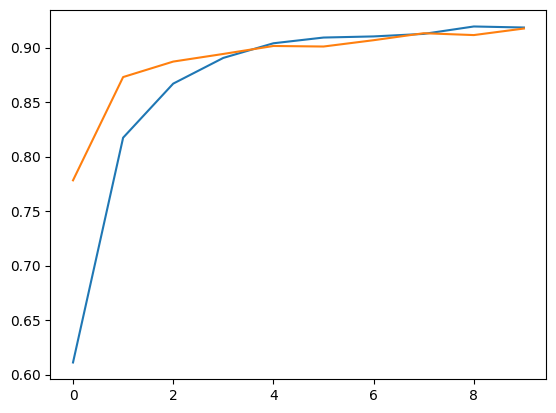

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

### L1 and L2 regularization

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5293 - loss: 4.5244 - val_accuracy: 0.8800 - val_loss: 0.5899
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8927 - loss: 0.5152 - val_accuracy: 0.9243 - val_loss: 0.3857
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9308 - loss: 0.3412 - val_accuracy: 0.9373 - val_loss: 0.3152
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9457 - loss: 0.2712 - val_accuracy: 0.9465 - val_loss: 0.2709
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9565 - loss: 0.2278 - val_accuracy: 0.9555 - val_loss: 0.2351
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9614 - loss: 0.2030 - val_accuracy: 0.9539 - val_loss: 0.2429
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9650 - loss: 0.1891 - val_accuracy: 0.9563 - val_loss: 0.2210
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9676 - loss: 0.1754 - val_accuracy: 0.

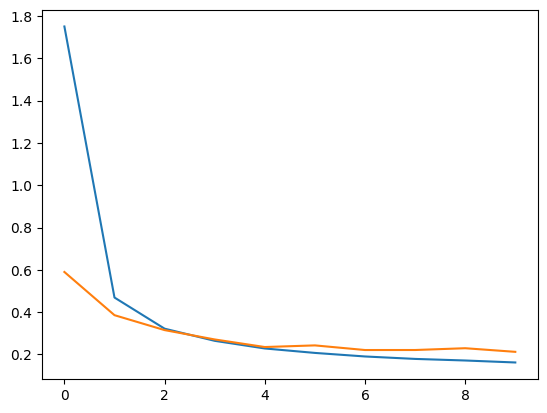

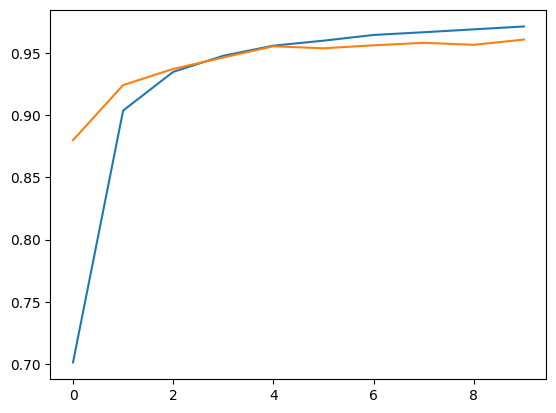

In [ ]:
from keras import regularizers

input_layer = Input(shape=(784, ), name='input_layer')

layer_1 = Dense(32, activation='relu', name='layer_1', kernel_regularizer=regularizers.L1(1e-4))(input_layer)
layer_2 = Dense(64, activation='relu', name='layer_2', kernel_regularizer=regularizers.L1(1e-4))(layer_1)
layer_3 = Dense(32, activation='relu', name='layer_3', kernel_regularizer=regularizers.L1(1e-4))(layer_2)

output_layer = Dense(10, activation='softmax', name='output_layer', kernel_regularizer=regularizers.L1(1e-4))(layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

adam = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.988)
scce = SparseCategoricalCrossentropy()
acc, f1_score = Accuracy(), F1Score

model.compile(optimizer=adam, loss=scce, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=10)

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5281 - loss: 5.1579 - val_accuracy: 0.8466 - val_loss: 0.5678
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8788 - loss: 0.4512 - val_accuracy: 0.9030 - val_loss: 0.3725
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9169 - loss: 0.3091 - val_accuracy: 0.9247 - val_loss: 0.2889
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9321 - loss: 0.2472 - val_accuracy: 0.9169 - val_loss: 0.3172
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9403 - loss: 0.2163 - val_accuracy: 0.9338 - val_loss: 0.2454
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9477 - loss: 0.1859 - val_accuracy: 0.9385 - val_loss: 0.2400
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9516 - loss: 0.1703 - val_accuracy: 0.9434 - val_loss: 0.2160
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9579 - loss: 0.1468 - val_accuracy: 0.

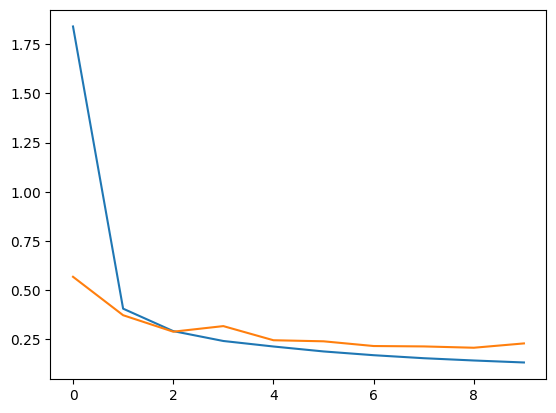

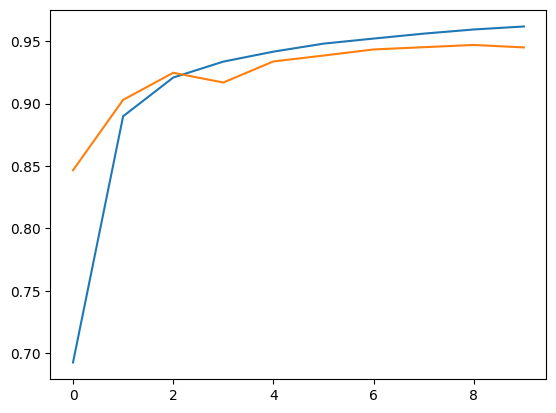

In [ ]:
input_layer = Input(shape=(784, ), name='input_layer')

layer_1 = Dense(32, activation='relu', name='layer_1', kernel_regularizer=regularizers.L2(1e-5))(input_layer)
layer_2 = Dense(64, activation='relu', name='layer_2', kernel_regularizer=regularizers.L2(1e-5))(layer_1)
layer_3 = Dense(32, activation='relu', name='layer_3', kernel_regularizer=regularizers.L2(1e-5))(layer_2)

output_layer = Dense(10, activation='softmax', name='output_layer', kernel_regularizer=regularizers.L2(1e-5))(layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

adam = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.988)
scce = SparseCategoricalCrossentropy()
acc, f1_score = Accuracy(), F1Score

model.compile(optimizer=adam, loss=scce, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=10)

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

### batch normalization

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7455 - loss: 0.8267 - val_accuracy: 0.9369 - val_loss: 0.2455
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9484 - loss: 0.1688 - val_accuracy: 0.9517 - val_loss: 0.2419
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9624 - loss: 0.1224 - val_accuracy: 0.9549 - val_loss: 0.2147
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9695 - loss: 0.0997 - val_accuracy: 0.9580 - val_loss: 0.2210
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9735 - loss: 0.0812 - val_accuracy: 0.9605 - val_loss: 0.1995
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9760 - loss: 0.0732 - val_accuracy: 0.9585 - val_loss: 0.2607
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9803 - loss: 0.0626 - val_accuracy: 0.9633 - val_loss: 0.2276
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9819 - loss: 0.0569 - val_accuracy: 0.

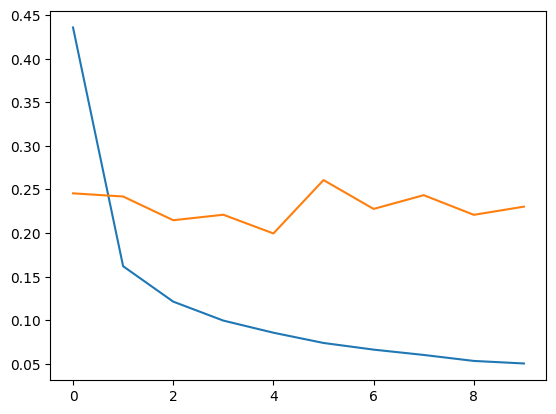

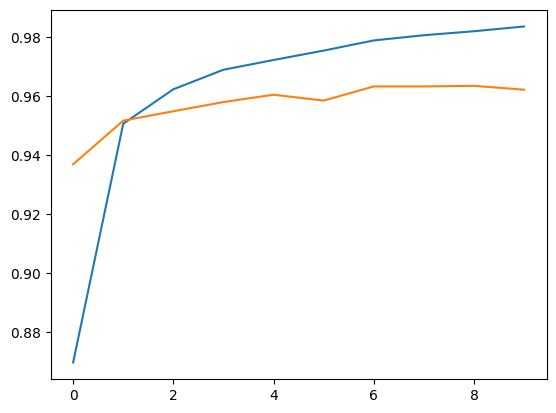

In [ ]:
from keras.layers import BatchNormalization

input_layer = Input(shape=(784, ), name='input_layer')

input_bn = BatchNormalization()(input_layer)
layer_1 = Dense(32, activation='relu', name='layer_1')(input_bn)
layer_1_bn = BatchNormalization()(layer_1)
layer_2 = Dense(64, activation='relu', name='layer_2')(layer_1_bn)
layer_2_bn = BatchNormalization()(layer_2)
layer_3 = Dense(32, activation='relu', name='layer_3')(layer_2_bn)
layer_3_bn = BatchNormalization()(layer_3)

output_layer = Dense(10, activation='softmax', name='output_layer')(layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

adam = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.988)
scce = SparseCategoricalCrossentropy()
acc, f1_score = Accuracy(), F1Score

model.compile(optimizer=adam, loss=scce, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=10)

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

### drop out

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2643 - loss: 6.7237 - val_accuracy: 0.7081 - val_loss: 1.0423
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6793 - loss: 1.0820 - val_accuracy: 0.8033 - val_loss: 0.6747
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7482 - loss: 0.8231 - val_accuracy: 0.8460 - val_loss: 0.5521
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8229 - loss: 0.6164 - val_accuracy: 0.9290 - val_loss: 0.3380
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9091 - loss: 0.3888 - val_accuracy: 0.9422 - val_loss: 0.2858
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9232 - loss: 0.3338 - val_accuracy: 0.9434 - val_loss: 0.2704
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9327 - loss: 0.3016 - val_accuracy: 0.9524 - val_loss: 0.2387
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9352 - loss: 0.2835 - val_accuracy: 0.

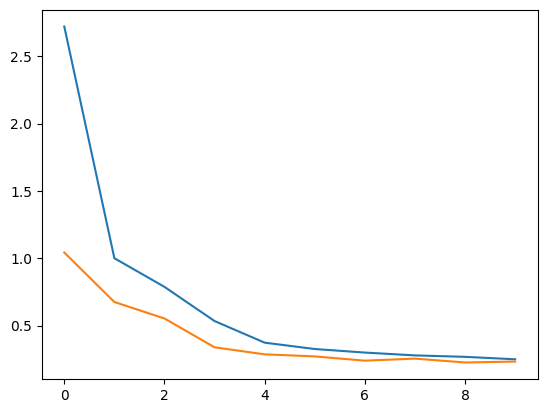

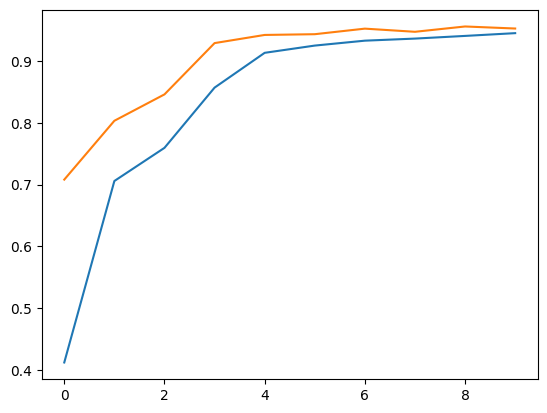

In [ ]:
from keras.layers import Dropout

input_layer = Input(shape=(784, ), name='input_layer')

layer_1 = Dense(32, activation='relu', name='layer_1', kernel_regularizer=regularizers.L1(1e-4))(input_layer)
layer_1_dropout = Dropout(0.1)(layer_1)
layer_2 = Dense(64, activation='relu', name='layer_2', kernel_regularizer=regularizers.L1(1e-4))(layer_1_dropout)
layer_2_dropout = Dropout(0.1)(layer_2)
layer_3 = Dense(32, activation='relu', name='layer_3', kernel_regularizer=regularizers.L1(1e-4))(layer_2_dropout)
layer_3_dropout = Dropout(0.1)(layer_3)

output_layer = Dense(10, activation='softmax', name='output_layer', kernel_regularizer=regularizers.L1(1e-4))(layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

adam = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.988)
scce = SparseCategoricalCrossentropy()
acc, f1_score = Accuracy(), F1Score

model.compile(optimizer=adam, loss=scce, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=10)

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

### regularization + batch normalization + more neurons

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7815 - loss: 0.7182 - val_accuracy: 0.9369 - val_loss: 0.2487
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9538 - loss: 0.1739 - val_accuracy: 0.9527 - val_loss: 0.1956
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9649 - loss: 0.1346 - val_accuracy: 0.9610 - val_loss: 0.1768
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9724 - loss: 0.1112 - val_accuracy: 0.9617 - val_loss: 0.1767
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9752 - loss: 0.0991 - val_accuracy: 0.9650 - val_loss: 0.1612
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9785 - loss: 0.0879 - val_accuracy: 0.9642 - val_loss: 0.1580
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9805 - loss: 0.0822 - val_accuracy: 0.9644 - val_loss: 0.1682
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9824 - loss: 0.0747 - val_accuracy: 0.

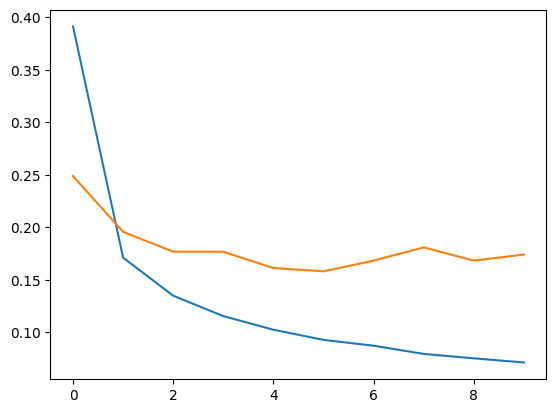

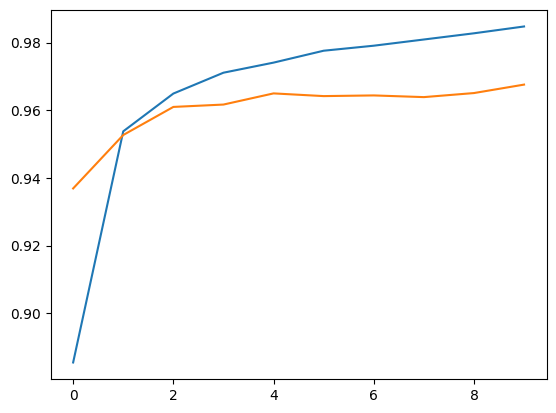

In [ ]:
input_layer = Input(shape=(784, ), name='input_layer')

input_bn = BatchNormalization()(input_layer)
layer_1 = Dense(32, activation='relu', name='layer_1', kernel_regularizer=regularizers.L2(1e-4))(input_bn)
layer1_bn = BatchNormalization()(layer_1)
layer_2 = Dense(64, activation='relu', name='layer_2', kernel_regularizer=regularizers.L2(1e-4))(layer1_bn)
layer2_bn = BatchNormalization()(layer_2)
layer_3 = Dense(128, activation='relu', name='layer_3', kernel_regularizer=regularizers.L2(1e-4))(layer2_bn)
layer3_bn = BatchNormalization()(layer_3)

output_layer = Dense(10, activation='softmax', name='output_layer', kernel_regularizer=regularizers.L2(1e-4))(layer3_bn)

model = Model(inputs=input_layer, outputs=output_layer)

adam = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.988)
scce = SparseCategoricalCrossentropy()
acc, f1_score = Accuracy(), F1Score

model.compile(optimizer=adam, loss=scce, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=10)

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])